In [45]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.resnet import ResNet152
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [46]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/test'

In [47]:
# Import the ResNet 152 library as shown below and add preprocessing layer to the front of ResNet
# Here we will be using imagenet weights

res = ResNet152(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234708992/234698864 [==============================] - 2s 0us/step


In [48]:
# don't train existing weights
for layer in res.layers:
    layer.trainable = False

In [49]:
# defining folders varaiable to get number of output classes
folders = glob('/content/drive/MyDrive/chest_xray/train/*')

In [50]:
# output layers 
x = Flatten()(res.output)

In [51]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model object
model = Model(inputs=res.input, outputs=prediction)

In [52]:
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [53]:
# defining the cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [54]:
# Using the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [55]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5221 images belonging to 2 classes.


In [56]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [57]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [58]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
164/164 [==============================] - 193s 1s/step - loss: 0.7976 - accuracy: 0.7918 - val_loss: 0.4169 - val_accuracy: 0.8189
Epoch 2/5
164/164 [==============================] - 173s 1s/step - loss: 0.3530 - accuracy: 0.8541 - val_loss: 0.3869 - val_accuracy: 0.8349
Epoch 3/5
164/164 [==============================] - 163s 991ms/step - loss: 0.2869 - accuracy: 0.8765 - val_loss: 0.8957 - val_accuracy: 0.6811
Epoch 4/5
164/164 [==============================] - 161s 980ms/step - loss: 0.2790 - accuracy: 0.8916 - val_loss: 0.7307 - val_accuracy: 0.7163
Epoch 5/5
164/164 [==============================] - 160s 977ms/step - loss: 0.2600 - accuracy: 0.8935 - val_loss: 0.3604 - val_accuracy: 0.8462


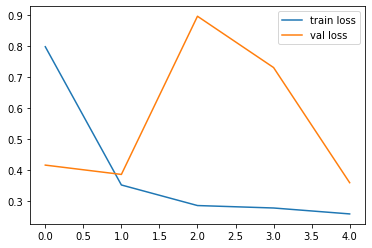

<Figure size 432x288 with 0 Axes>

In [59]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

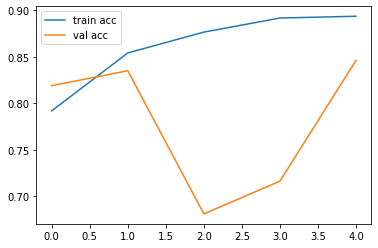

<Figure size 432x288 with 0 Axes>

In [60]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')